# Asset Allocation and Portfolio Optimization Part2
- Hierarchical Risk Parity, PyPortfolioOpt. https://pyportfolioopt.readthedocs.io/en/latest/OtherOptimizers.html
- Black-Litterman Allocation, PyPortfolioOpt. https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html
- Ledoit-Wolf vs OAS Estimation in Scikit Learn. https://www.geeksforgeeks.org/ledoit-wolf-vs-oas-estimation-in-scikit-learn/
- Honey, I Shrunk the Sample Covariance Matrix. http://www.ledoit.net/honey.pdf
- A Step-by-Step Guide to the Black-Litterman Model. https://www.cis.upenn.edu/~mkearns/finread/idzorek.pdf
- The Black-Litterman Model In Detail. http://brandouy.free.fr/documents/MF2012/Black-Litterman-Walters.pdf
- Portfolio Optimization II : Black-Litterman model.https://www.quantandfinancial.com/2013/08/black-litterman.html
- BERT’s sentiment score for portfolio optimization: a fine-tuned view in Black and Litterman model. https://www.researchgate.net/publication/360956499_BERT's_sentiment_score_for_portfolio_optimization_a_fine-tuned_view_in_Black_and_Litterman_model
- Exploring the Application of Kelly’s Criterion in Portfolio Optimization. https://bsic.it/exploring-the-application-of-kellys-criterion-in-portfolio-optimization/
- The Ultimate Trading Strategy: How to Combine Kelly Criteria and Monte Carlo Simulation. https://medium.com/@The-Quant-Trading-Room/the-ultimate-trading-strategy-how-to-combine-kelly-criteria-and-monte-carlo-simulation-d9ce8cc2c2bc
- Riskfolio-Lib Tutorial: https://nbviewer.org/github/dcajasn/Riskfolio-Lib/blob/master/examples/Tutorial%2022%20-%20Logarithmic%20Mean%20Risk%20Optimization%20%28Kelly%20Criterion%29.ipynb

## Finding Optimal Portfolio with Hierarchical Risk Parity(HRP)

### Procedures:
1. Calculate `distance matrix` based on correlation/covariance matrix
2. Cluster the assets into `hierarchical clustering tree` based on distance matrix
3. Obtain the `minimum variance portfolio` of each branch of tree
4. Iteract over levels of tree and combine the portfolios at each node

### Advantages:
- Utilize the information from covariance matrix
- The weights this method got it stable and robust
- HRP outperforms the classical mean-variance approach out-of-sample

In [ ]:
!pip install yfinance
import yfinance as yf
!pip install PyPortfolioOpt
import pypfopt
import pandas as pd
import numpy as np
from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.0 MB/s eta 0:00:00


In [ ]:
#download stock datset
stock=['SBUX','KO','NSRGY','MCD','QSR','SHAK','BUD','SAM','SVNDY','MEJHY','YUM','KHC','MMM','PYPL','GE','GOOG','AAPL']
prices = yf.download(stock,start="2022-01-01",end="2022-12-31",progress=False)
prices= prices['Adj Close']

In [ ]:
#convert price to return
returns=returns_from_prices(prices)

In [ ]:
#get the optimial portfolio using HRP
HRP=HRPOpt(returns=returns) #based on covariance matrix, we take returns series as input
HRP.optimize() #find the optimial weights

OrderedDict([('AAPL', 0.01718614998760031),
             ('BUD', 0.063057372425412),
             ('GE', 0.03837432402398777),
             ('GOOG', 0.014492938384834684),
             ('KHC', 0.10741856415448707),
             ('KO', 0.11327796351750644),
             ('MCD', 0.08487117483276176),
             ('MEJHY', 0.0731591476407132),
             ('MMM', 0.06275512477412366),
             ('NSRGY', 0.1308914661334426),
             ('PYPL', 0.01295261480030024),
             ('QSR', 0.06648521117703168),
             ('SAM', 0.032525489257236855),
             ('SBUX', 0.03410644924123123),
             ('SHAK', 0.011299593936796566),
             ('SVNDY', 0.07973652946694042),
             ('YUM', 0.0574098862455935)])

In [ ]:
#print the clean weights,rounds the weights to 5 decimals and clips near-zeros.
weights =HRP.clean_weights()
print(weights)

OrderedDict([('AAPL', 0.01719), ('BUD', 0.06306), ('GE', 0.03837), ('GOOG', 0.01449), ('KHC', 0.10742), ('KO', 0.11328), ('MCD', 0.08487), ('MEJHY', 0.07316), ('MMM', 0.06276), ('NSRGY', 0.13089), ('PYPL', 0.01295), ('QSR', 0.06649), ('SAM', 0.03253), ('SBUX', 0.03411), ('SHAK', 0.0113), ('SVNDY', 0.07974), ('YUM', 0.05741)])


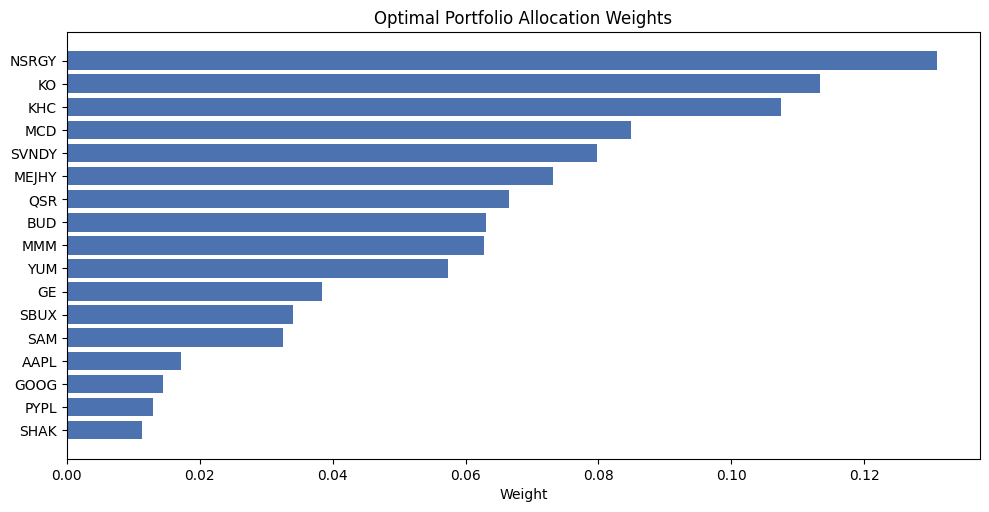

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights,ax=ax)
ax.set_title('Optimal Portfolio Allocation Weights')
plt.show()

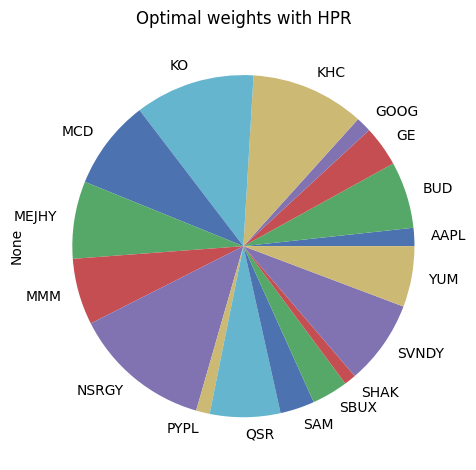

In [ ]:
#use a pie graph to visualize it
import seaborn as sns
pd.Series(weights).plot(kind="pie",title="Optimal weights with HPR");
sns.despine()
plt.tight_layout()

In [ ]:
#show the portfolio performance, calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
HRP.portfolio_performance(verbose=True, risk_free_rate=0.017)

Expected annual return: -4.6%
Annual volatility: 16.8%
Sharpe Ratio: -0.38


(-0.04608975476694341, 0.16756628380806513, -0.37650625969128787)

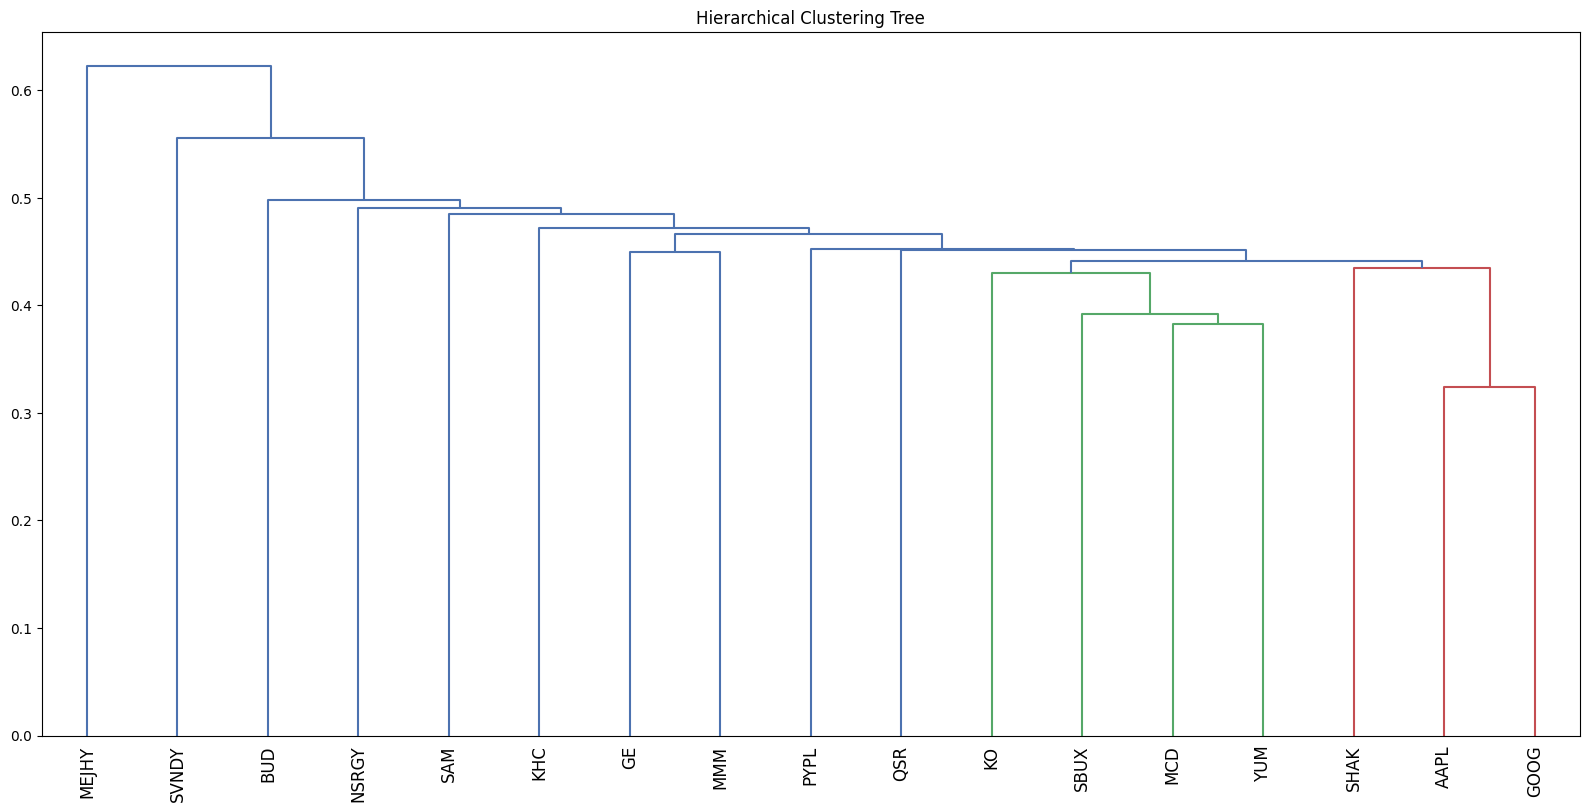

In [ ]:
#visualization of hierarchical clustering 
fig,ax=plt.subplots(figsize=(16,8))
plotting.plot_dendrogram(HRP,ax=ax,show_tickers=True)
ax.set_title('Hierarchical Clustering Tree')
plt.show()

Graph interpretation:
- y-axis: represents the distance between two leaves that are be merged.

In [ ]:
#find the numbers of stocks to buy using 100,000$
latest_prices=get_latest_prices(prices)
allocation=DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
allocation, leftover=allocation.lp_portfolio() #use linear programming to find numbers of stock we should buy
print(allocation) #get the corresponding numbers of stocks
print(leftover) #print the remaining money

{'AAPL': 13, 'BUD': 105, 'GE': 59, 'GOOG': 16, 'KHC': 267, 'KO': 179, 'MCD': 32, 'MEJHY': 565, 'MMM': 53, 'NSRGY': 113, 'PYPL': 18, 'QSR': 104, 'SAM': 10, 'SBUX': 35, 'SHAK': 27, 'SVNDY': 373, 'YUM': 45}
137.5535547985346


/usr/local/lib/python3.9/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


### Get Efficient Frontier using `pypfopt`

In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier

#### Ledoit-Wolf shrinkage
- formula:$\hat{\sum}=𝛅F+(1-𝛅)S$
  - $𝛅$: shrinkage intensity constant, range ∊ $(0,1)$
    - we can the optimal shrinkage constant $𝛅^*$, <u>minimizing the expected distance</u> between shrinkage estimator and true covariance matrix.
  - $F$: shrink target. 
    - in this case, it is single-factor matrix of **Sharpe**
  - $S$: the sample covariance matrix
  - $\sum$: population/true covriance matrix
  - a convex linear combination 
- shrink covariance matrix to other **structured** parameters which have lower estimation error.
- Effects:
   - shrinkage estimators yield higher Information ratio, higher mean excess return, lower standard deviation of excess return



In [ ]:
#get the mean and covariance matrix
mu = mean_historical_return(prices)
cov_matrix = CovarianceShrinkage(prices).ledoit_wolf() #S=cov_matrix in formula

Text(0.5, 1.0, 'Efficient Frontier with Ledoit-Wolf shrinkage Estimate of Covariance Matrix')

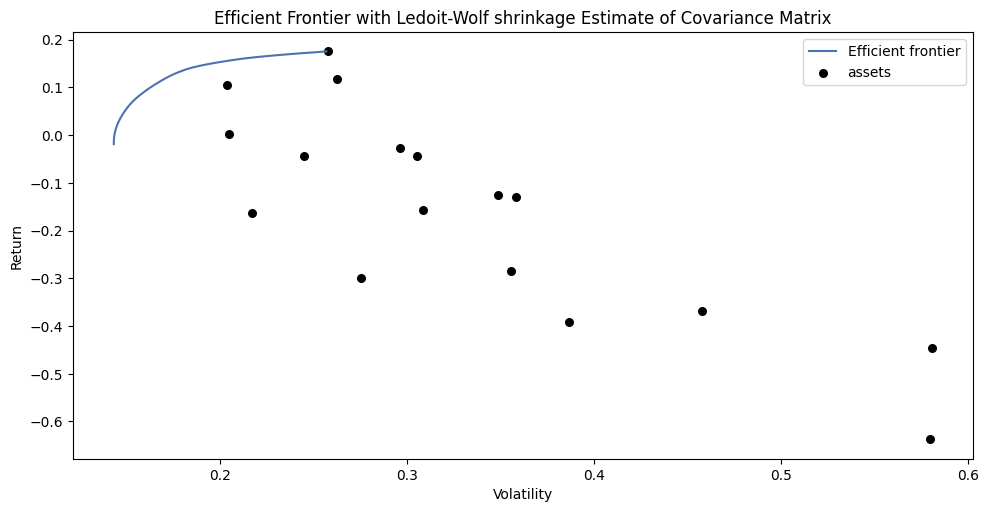

In [ ]:
#create and plot the efficient frontier
EF=EfficientFrontier(mu, cov_matrix)
fig, ax = plt.subplots(figsize=(10,5))
plot_efficient_frontier(EF, ax=ax, show_assets=True)
ax.set_title('Efficient Frontier with Ledoit-Wolf shrinkage Estimate of Covariance Matrix')

In [ ]:
#identify the tangency portfolio with max sharpe ratio
EF=EfficientFrontier(mu, cov_matrix,solver='SCS')
weights1=EF.max_sharpe(risk_free_rate=0)
print(EF.clean_weights())

OrderedDict([('AAPL', 0.0), ('BUD', 0.0), ('GE', 0.0), ('GOOG', 0.0), ('KHC', 0.55018), ('KO', 0.1514), ('MCD', 0.0), ('MEJHY', 0.0), ('MMM', 0.0), ('NSRGY', 0.0), ('PYPL', 0.0), ('QSR', 0.29841), ('SAM', 0.0), ('SBUX', 0.0), ('SHAK', 0.0), ('SVNDY', 0.0), ('YUM', 0.0)])


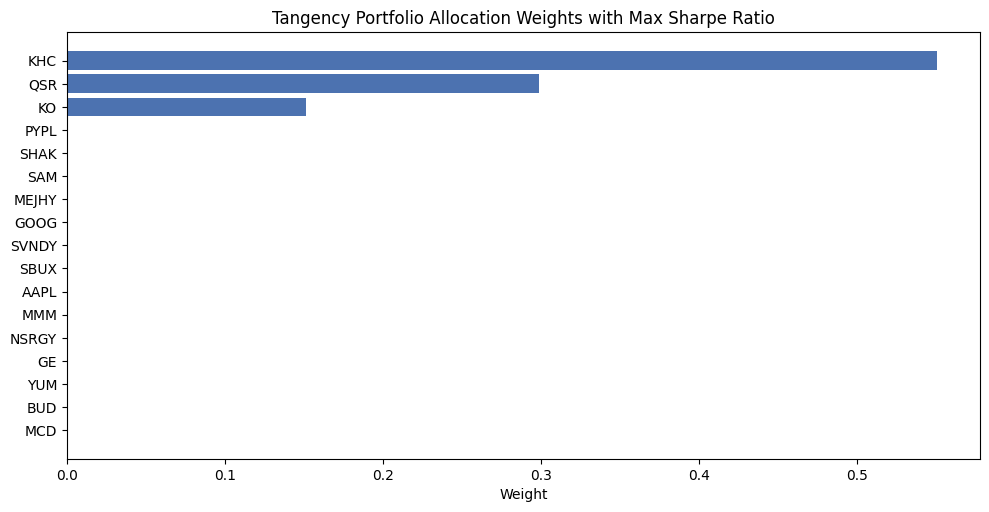

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights1,ax=ax)
ax.set_title('Tangency Portfolio Allocation Weights with Max Sharpe Ratio')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 14.8%
Annual volatility: 19.3%
Sharpe Ratio: 0.77


(0.14777358980065397, 0.19259932379945027, 0.7672591309537908)

In [ ]:
#add L2 regulation to portfolio optimization problem
from pypfopt import objective_functions
EF=EfficientFrontier(mu,cov_matrix)
EF.add_objective(objective_functions.L2_reg, gamma=0.2)
weights6=EF.max_sharpe(risk_free_rate=0)
print(EF.clean_weights())

OrderedDict([('AAPL', 0.0), ('BUD', 0.0), ('GE', 0.0), ('GOOG', 0.0), ('KHC', 0.45412), ('KO', 0.25356), ('MCD', 0.0), ('MEJHY', 0.0), ('MMM', 0.0), ('NSRGY', 0.0), ('PYPL', 0.0), ('QSR', 0.29232), ('SAM', 0.0), ('SBUX', 0.0), ('SHAK', 0.0), ('SVNDY', 0.0), ('YUM', 0.0)])


/usr/local/lib/python3.9/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


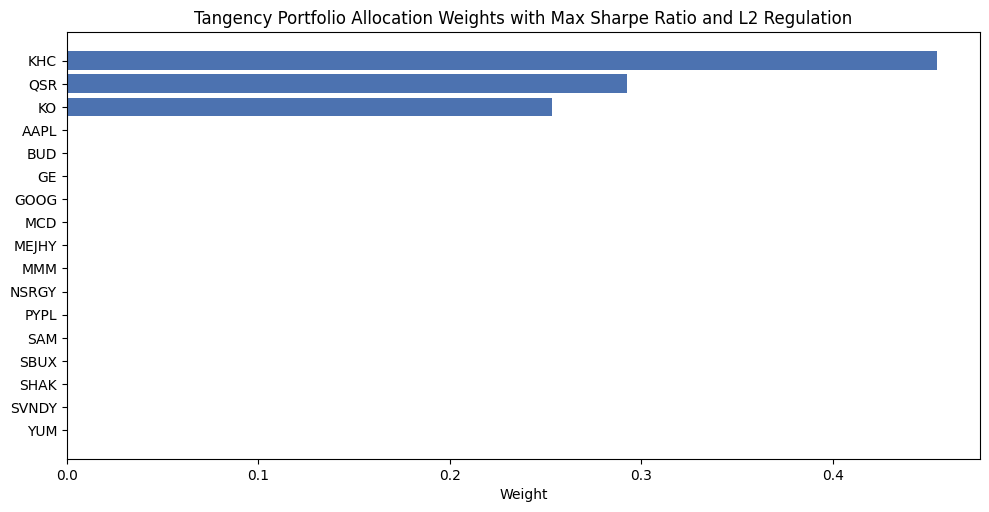

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights6,ax=ax)
ax.set_title('Tangency Portfolio Allocation Weights with Max Sharpe Ratio and L2 Regulation')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 14.1%
Annual volatility: 18.5%
Sharpe Ratio: 0.76


(0.14096034641804747, 0.18490275593365957, 0.7623485421094643)

In [ ]:
#find the portfolio with minimum volatility
EF=EfficientFrontier(mu, cov_matrix,solver='SCS')
weights2=EF.min_volatility()
print(EF.clean_weights())

OrderedDict([('AAPL', 0.0), ('BUD', 0.0), ('GE', 0.0), ('GOOG', 0.0), ('KHC', 0.15911), ('KO', 0.0531), ('MCD', 0.26405), ('MEJHY', 0.16343), ('MMM', 0.01427), ('NSRGY', 0.16805), ('PYPL', 0.0), ('QSR', 0.06067), ('SAM', 0.0), ('SBUX', 0.0), ('SHAK', 0.0), ('SVNDY', 0.11732), ('YUM', 0.0)])


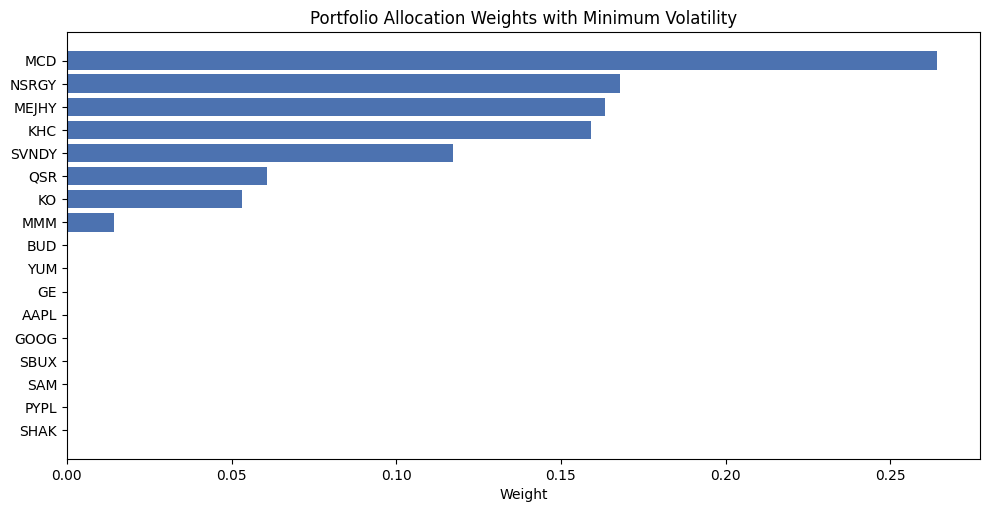

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights2,ax=ax)
ax.set_title('Portfolio Allocation Weights with Minimum Volatility')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: -1.9%
Annual volatility: 14.3%
Sharpe Ratio: -0.13


(-0.018850460266704876, 0.1434345708958261, -0.13142201457412678)

In [ ]:
#Finds the portfolio that maximizes the quadratic utility, given a level of risk aversion.
EF=EfficientFrontier(mu, cov_matrix,solver='SCS')
weights3=EF.max_quadratic_utility(risk_aversion=3,market_neutral=False) #market_neutral: whether portfolios with weights summed up to 0 or not.
print(EF.clean_weights())

OrderedDict([('AAPL', 0.0), ('BUD', 0.0), ('GE', 0.0), ('GOOG', 0.0), ('KHC', 0.65557), ('KO', 0.04346), ('MCD', 0.0), ('MEJHY', 0.0), ('MMM', 0.0), ('NSRGY', 0.0), ('PYPL', 0.0), ('QSR', 0.30097), ('SAM', 0.0), ('SBUX', 0.0), ('SHAK', 0.0), ('SVNDY', 0.0), ('YUM', 0.0)])


- Formula: $max \space w^T\mu-\frac{𝛅}{2}w^T\sum w$

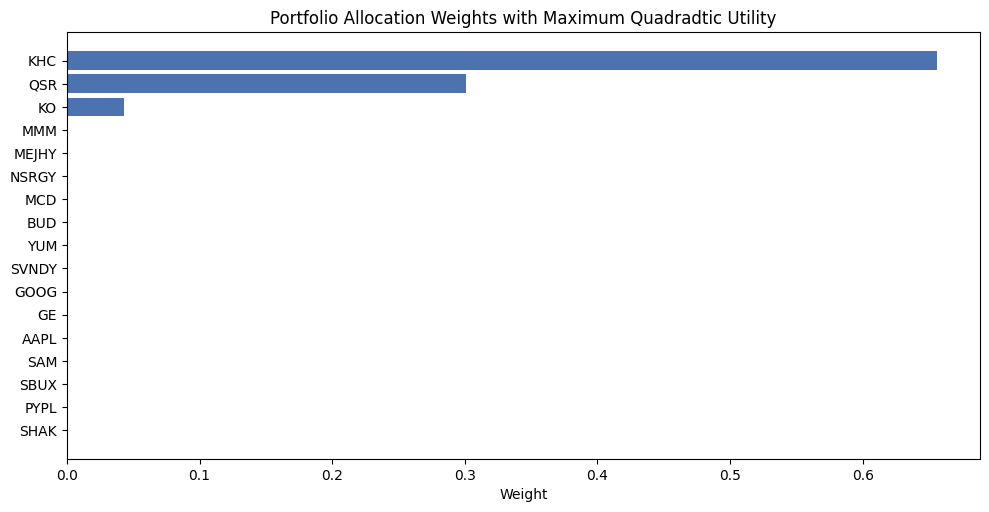

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights3,ax=ax)
ax.set_title('Portfolio Allocation Weights with Maximum Quadradtic Utility')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 15.5%
Annual volatility: 20.4%
Sharpe Ratio: 0.76


(0.15520004535005966, 0.20355008532740754, 0.7624661276875542)

In [ ]:
#find the portfolio allocation weights with max return for a given risk level, for market neutral portfolio
EF=EfficientFrontier(mu, cov_matrix,solver='SCS')
weights4=EF.efficient_risk(target_volatility=0.20,market_neutral=True) 
print(EF.clean_weights())

OrderedDict([('AAPL', -0.07305), ('BUD', 0.01911), ('GE', 0.1151), ('GOOG', -0.19273), ('KHC', 0.11248), ('KO', 0.59485), ('MCD', -0.16284), ('MEJHY', -0.09965), ('MMM', -0.44823), ('NSRGY', -0.29854), ('PYPL', -0.09606), ('QSR', 0.46978), ('SAM', -0.05267), ('SBUX', 0.13537), ('SHAK', -0.03919), ('SVNDY', 0.05453), ('YUM', -0.03827)])


/usr/local/lib/python3.9/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:175: RuntimeWarning: Market neutrality requires shorting - bounds have been amended
  warnings.warn(


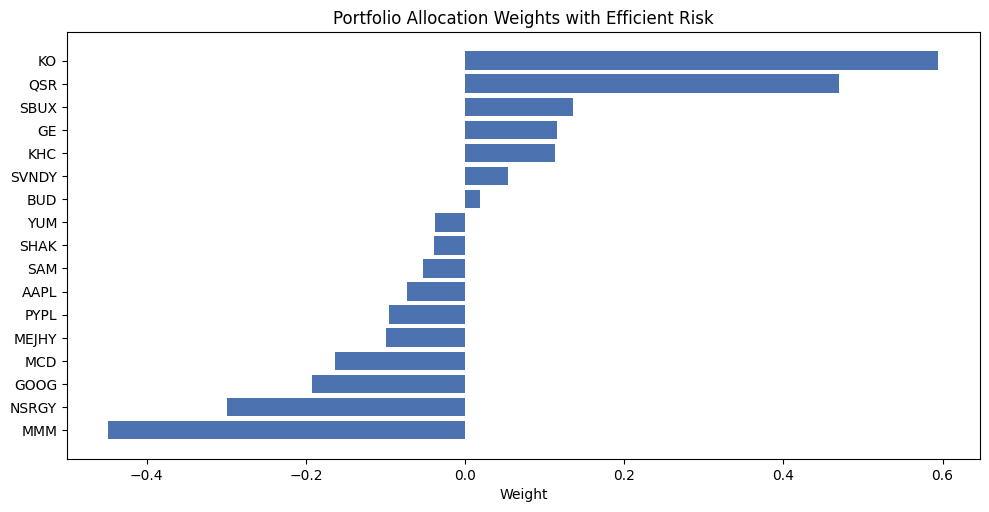

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights4,ax=ax)
ax.set_title('Portfolio Allocation Weights with Efficient Risk')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 49.7%
Annual volatility: 20.0%
Sharpe Ratio: 2.48


(0.49678046385400076, 0.2000046658338893, 2.4838443732437416)

In [ ]:
#find the portfolio allocation weights with minimum risk level for a given target return, for market neutral portfolio
EF=EfficientFrontier(mu, cov_matrix,solver='SCS')
weights5=EF.efficient_return(target_return=0.10,market_neutral=True) 
print(EF.clean_weights())

OrderedDict([('AAPL', -0.01466), ('BUD', 0.00389), ('GE', 0.02318), ('GOOG', -0.03883), ('KHC', 0.02269), ('KO', 0.11953), ('MCD', -0.03252), ('MEJHY', -0.02005), ('MMM', -0.09029), ('NSRGY', -0.06009), ('PYPL', -0.01935), ('QSR', 0.09459), ('SAM', -0.0106), ('SBUX', 0.02727), ('SHAK', -0.00789), ('SVNDY', 0.01099), ('YUM', -0.00786)])


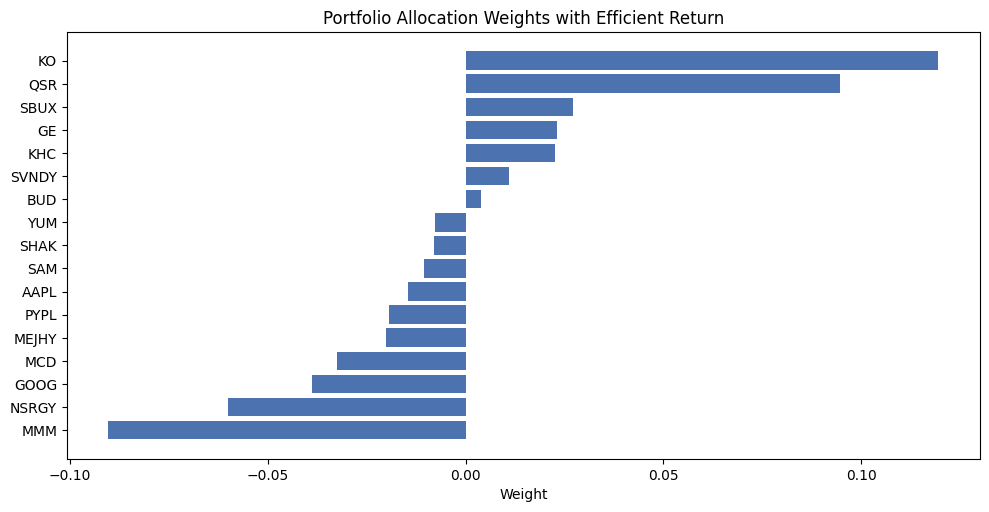

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
plotting.plot_weights(weights5,ax=ax)
ax.set_title('Portfolio Allocation Weights with Efficient Return')
plt.show()

In [ ]:
EF.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 10.0%
Annual volatility: 4.0%
Sharpe Ratio: 2.48


(0.10001474796792742, 0.04026613613803522, 2.4838426916620366)

## Black-Litterman in Portfolio Optimization
- Formula: $E(R)-R_f=[(τ∑)^{-1}+P^TΩ^{-1}P]^{-1}[(τ∑)^{-1}∏+P^TΩ^{-1}Q]$
  - Distribution: $N \sim (E(R),[(\tau\sum)^{-1}+(P'Ω^{-1}P)]^{-1})$
  - $Q$: view matrix, magnitude of each view
  - $P$: picking matrix which matches viewers to multiple assets
  - $Ω$: a dignonal covariance matrix of error terms from views, representing the uncertainty in each view
    - $Ω=τ*P\sum P^T$
    - it is proportion to the variance of priors.
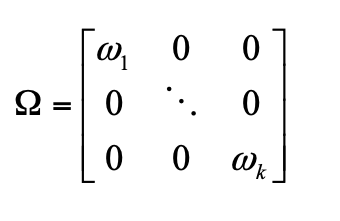
  - $∏$: vector of **previous** expected returns, implied equilibrium return vector, treated as a neutral starting point
    - Called `prior` $N \sim (\prod, \tau∑)$
    - $\prod=𝝀\sum w_{mkt}$
      - $λ$: risk aversion coefficient
        - market implied risk premium: $𝝀=\frac{R-R_f}{\sigma^2}$
      - $w_{mkt}$: *market cap weights* of assets
  - $∑$: covariance matrix of asset returns
  - $τ$: scalar tuning constant
    - By default, we choose $τ=0.05$
  - $K$: numbers of viewer
  - $N$: numbers of assets
- **Posterior** covariance: $\hat{\sum}=[(τ\sum)^{-1}+P^TΩ^{-1}P]^{-1}$
- Weight $w$ of asset to invest in optimal portfolio--the **OUTPUT** of the model
  - $w=(𝛅\sum)^{-1}E(R)$
- Investor Views:
  - related parameters: $P$ & $Q$
  - investors' expected return of some assets in a portfolio
  - it can be expressed by relative(outperforming, underperforming) or absolute view
  - variance of individual view portfolio:
    - Formula: $p_k\sum p_k'=w/τ$
    - it is source of imformation regarding uncertainty, the **level of confidence** should be placed on a view.
  - View's distribution: $N \sim (Q,Ω)$
- Implied Confidence level:
  - Method1:
    - formula: $\frac{\hat{w}-w_{mkt}}{\hat{w_{100\%}}-w_{mkt}}$ 
      - $w_{100\%}$: the weight vector based on 100% confidence in the views
  - Method2: 
    - Formula: $w_{k,\%}=w_{mkt}+Tilt_k$
      - $Tilt_k$: target weight vector
      - $Tilt_k=(w_{100\%}-w_{mkt})*C_k$
        - $w_{100\%}-w_{mkt}$: $D$, the departure from market capitalization weight
        - $C_k$: user-specified confidence level
        - $Tilt_k$: approximate tilt caused by kth view 
  

In [ ]:
!pip install pyfolio
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88685 sha256=baede5a924d89594497a6b4be4d929e74b84fe71040eb4821b3fb7770d1cef90
  Stored in directory: /root/.cache/pip/wheels/75/c7/b9/986a1ba8adb2afce230e1a497dc11aeb33efef4fc8dfd6c649
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39779 sha256=ef0d4a33d8d5370d72ce26473577b5e0c1537b986ade95f314dcf9140ef63db3
  Stored in directory: /root/.cache/pip/wheels/67/23/d1/a4ef8ff88dc9af7b0eeb1b6fd0d90c6057eaad5a2df25f4e3f
Successfully built pyfolio empyrical


/usr/local/lib/python3.9/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
from pypfopt import BlackLittermanModel, black_litterman, risk_models, DiscreteAllocation, EfficientFrontier, objective_functions
import datetime
!pip install backtrader
import backtrader as bt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.1/410.1 KB 10.3 MB/s eta 0:00:00


In [ ]:
#download the stocks we are interested in
tickers=['AAPL','AMZN','MSFT','AVGO','PEP','ADBE','MDLZ','AZN','NFLX','TMUS']
dailyPrices=yf.download(tickers,'2016-01-01','2021-12-31', progress=False)
prices=dailyPrices['Adj Close']
#get the market daily prices
mkt=yf.download('^GSPC','2016-01-01','2021-12-31', progress=False)['Adj Close']
#get the treasury bill prices as Rf
TBill=yf.download('^IRX', '2016-01-01','2021-12-31',progress=False)['Adj Close']

In [ ]:
prices.head()

,AAPL,ADBE,AMZN,AVGO,AZN,MDLZ,MSFT,NFLX,PEP,TMUS
Date,,,,,,,,,,
2016-01-04,24.074739,91.970001,31.849501,112.946167,25.790058,37.569187,49.007935,109.959999,80.129425,38.950001
2016-01-05,23.471445,92.339996,31.689501,109.167542,26.176132,37.878048,49.231518,107.660004,80.681107,40.220001
2016-01-06,23.012114,91.019997,31.632500,105.809616,25.743727,37.740776,48.337219,117.680000,80.705437,40.049999
2016-01-07,22.040897,89.110001,30.396999,102.443787,24.817135,35.681717,46.655926,114.559998,79.155907,40.509998
2016-01-08,22.157446,87.849998,30.352501,101.769028,24.531435,35.166954,46.799015,111.389999,78.863869,39.880001


In [136]:
returnsforBL=pd.DataFrame(prices.pct_change().dropna())
returnsforBL.head()

,AAPL,ADBE,AMZN,AVGO,AZN,MDLZ,MSFT,NFLX,PEP,TMUS
Date,,,,,,,,,,
2016-01-05,-0.025059,0.004023,-0.005024,-0.033456,0.014970,0.008221,0.004562,-0.020917,0.006885,0.032606
2016-01-06,-0.019570,-0.014295,-0.001799,-0.030759,-0.016519,-0.003624,-0.018165,0.093071,0.000302,-0.004227
2016-01-07,-0.042205,-0.020984,-0.039058,-0.031810,-0.035993,-0.054558,-0.034783,-0.026513,-0.019200,0.011486
2016-01-08,0.005288,-0.014140,-0.001464,-0.006587,-0.011512,-0.014427,0.003067,-0.027671,-0.003690,-0.015552
2016-01-11,0.016192,0.017416,0.017610,-0.001248,-0.007240,0.016834,-0.000574,0.032139,0.002366,-0.005015


In [ ]:
mkt.head()

Date
2016-01-04    2012.660034
2016-01-05    2016.709961
2016-01-06    1990.260010
2016-01-07    1943.089966
2016-01-08    1922.030029
Name: Adj Close, dtype: float64

In [ ]:
TBill.head()

Date
2016-01-04    0.155
2016-01-05    0.205
2016-01-06    0.205
2016-01-07    0.190
2016-01-08    0.190
Name: Adj Close, dtype: float64

In [ ]:
#get market cap
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info['marketCap']
print(mcaps)

{'AAPL': 2620585672704, 'AMZN': 1051581480960, 'MSFT': 2137710788608, 'AVGO': 262249365504, 'PEP': 252929196032, 'ADBE': 177570152448, 'MDLZ': 97340334080, 'AZN': 223332679680, 'NFLX': 154424164352, 'TMUS': 181833940992}


In [ ]:
#calculate the covariance matrix
S=risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta=black_litterman.market_implied_risk_aversion(mkt)
delta

4.198753285384581

<Axes: >

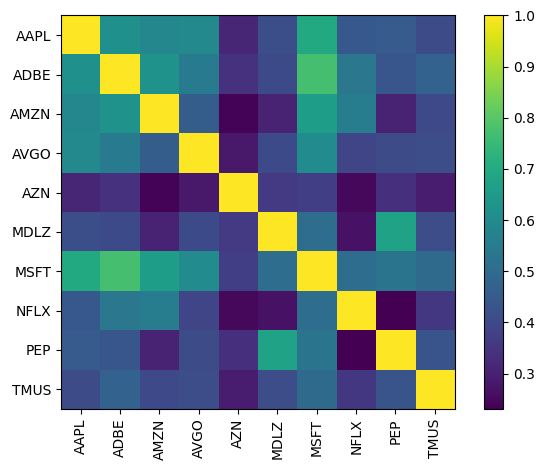

In [ ]:
#plot the covariance matrix 𝝨
plotting.plot_covariance(S,plot_correlation=True,title='Asset Correlation Matrix')

In [ ]:
#get market prior ∏
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
print(market_prior)

AAPL    0.284383
ADBE    0.265802
AMZN    0.244510
AVGO    0.250869
AZN     0.122357
MDLZ    0.135529
MSFT    0.259540
NFLX    0.244283
PEP     0.128627
TMUS    0.166937
dtype: float64


<Axes: title={'center': 'Market Implied Returns'}>

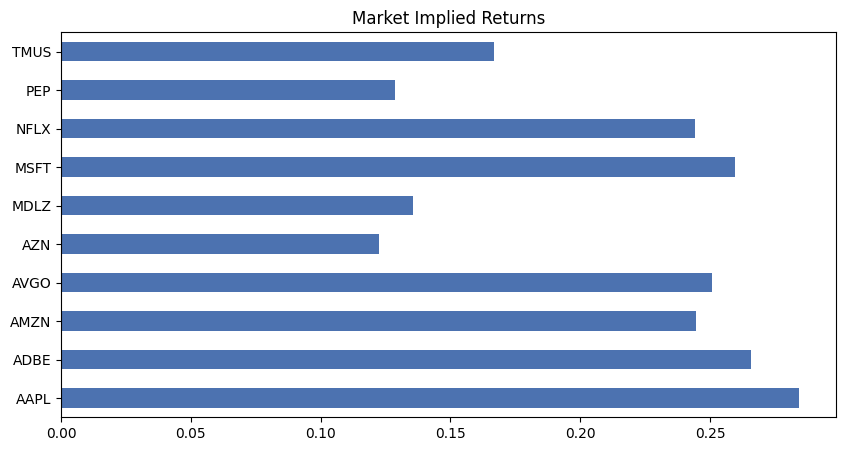

In [ ]:
market_prior.plot.barh(figsize=(10,5),title='Market Implied Returns')

In [ ]:
# View related: Q and P
#we can provide relative or absolute views
#absolute view: the return estimate for each asset
#relative view: the return comparison between one stock and another, the P and Q matrix use to calculate by yourself
viewdict={
    'AAPL':0.056,
    'AMZN':0.100,
    'MSFT':0.00603,
    'AZN':-0.0156,
    'MDLZ':-0.0303,
    'PEP':0.0960,
    'AVGO':0.0123,
    'ADBE':0.0186,
    'TMUS':0.053,
    'NFLX':0.0193,
}
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [ ]:
#confidence matrix(𝛀) and tau(𝜏)
confidences = [0.6,0.4,0.2,0.5,0.7, 0.7, 0.7, 0.5, 0.1, 0.4]
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences,tau=0.05,risk_aversion=delta)

In [ ]:
#print the diagnal value of omega
np.diag(bl.omega)

array([0.00287682, 0.00646731, 0.01434644, 0.00324721, 0.00108126,
       0.00086037, 0.00249524, 0.0050329 , 0.03448028, 0.0114718 ])

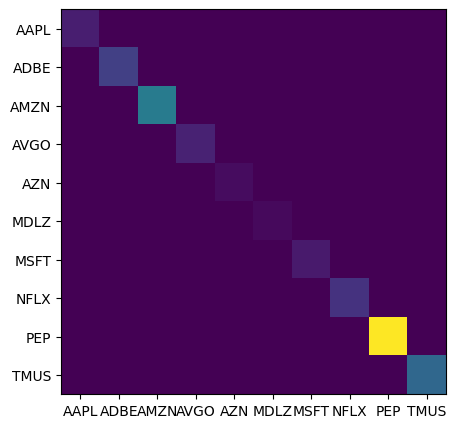

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(bl.omega)
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))
ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
#posterior estimates of expected return
bl = BlackLittermanModel(S, pi=market_prior, market_caps=mcaps, risk_aversion=delta, absolute_views=viewdict, omega=bl.omega)

In [ ]:
bl_returns=bl.bl_returns()
print(bl_returns)

AAPL    0.101696
ADBE    0.073768
AMZN    0.098849
AVGO    0.045381
AZN     0.017801
MDLZ    0.010758
MSFT    0.091103
NFLX    0.062854
PEP     0.065855
TMUS    0.056274
dtype: float64


In [ ]:
#combine prior, bl return, views expected return into a single dataframe
rets_df = pd.DataFrame([market_prior, bl_returns, pd.Series(viewdict)], index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.284383,0.101696,0.05600
ADBE,0.265802,0.073768,0.01860
AMZN,0.244510,0.098849,0.10000
AVGO,0.250869,0.045381,0.01230
AZN,0.122357,0.017801,-0.01560
MDLZ,0.135529,0.010758,-0.03030
MSFT,0.259540,0.091103,0.00603
NFLX,0.244283,0.062854,0.01930
PEP,0.128627,0.065855,0.09600
TMUS,0.166937,0.056274,0.05300


<Axes: >

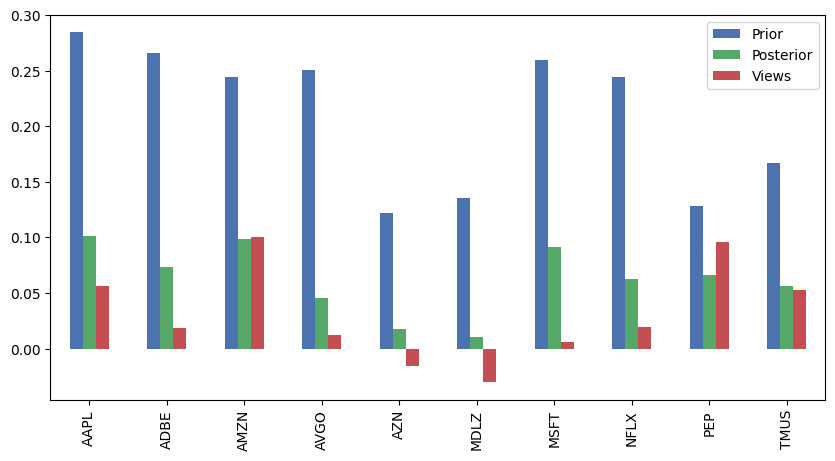

In [ ]:
#visualization the returns dataframe
rets_df.plot.bar(figsize=(10,5))

<Axes: >

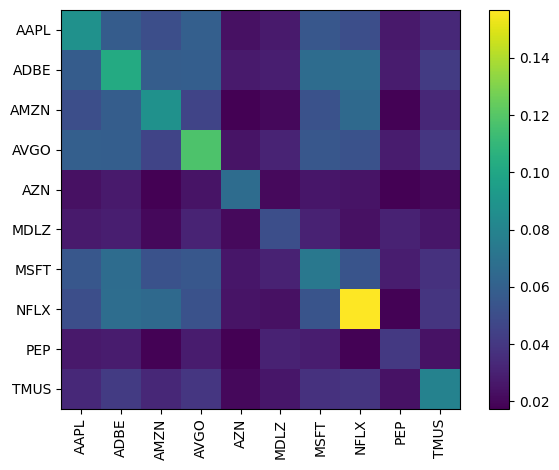

In [ ]:
bl_S=bl.bl_cov()
plotting.plot_covariance(bl_S)

In [ ]:
# portfolio allocation with L2 regulation
ef = EfficientFrontier(bl_returns, bl_S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
print(weights)
print(ef.portfolio_performance(verbose=True))

OrderedDict([('AAPL', 0.20667), ('ADBE', 0.11251), ('AMZN', 0.19853), ('AVGO', 0.02969), ('AZN', 0.0), ('MDLZ', 0.0), ('MSFT', 0.17433), ('NFLX', 0.07839), ('PEP', 0.1212), ('TMUS', 0.07867)])
Expected annual return: 8.4%
Annual volatility: 22.6%
Sharpe Ratio: 0.28
(0.08350758459715622, 0.22602120451248628, 0.28098064840481735)


/usr/local/lib/python3.9/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


<Axes: ylabel='None'>

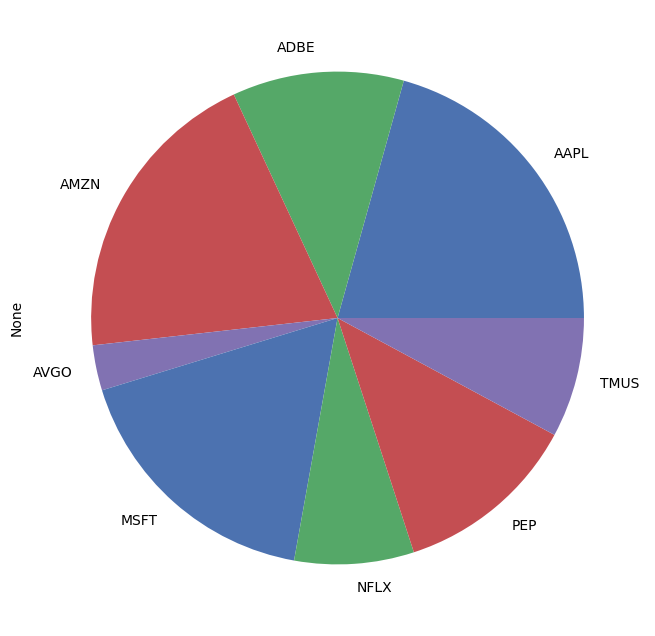

In [ ]:
#visualize it with pie graph
pd.Series(weights).plot.pie(figsize=(8,8))

In [ ]:
!pip install riskfolio-lib
import riskfolio as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 18.8 MB/s eta 0:00:00


In [148]:
#build the portfolio object
port=rp.Portfolio(returns=returnsforBL)
port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR','EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
port.solvers=['ECOS']
w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    weight = port.optimization(model='BL', rm=i, obj='Sharpe', rf=0, l=0, hist=True)
    w_s = pd.concat([w_s, weight], axis=1)
w_s.columns = rms #name the columns
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn') #plot with background color

ValueError: ignored

## Kelly Criterion in Portfolio Optimization（Logarithmic Mean Risk Optimization）
- Formula:  $f^*=p-\frac{q}{b}$
  - $p$: the probability of a win
  - $q=1-p$: the probability of a loss
  - $b$: the odds/payout/Win-Loss ratio
    - payput ratio: the amount of stand to win/the amount stand to loss
  - $f$: the percentage of total stack we should be putting at risk
- The growth rate: $R=(1+bf)^p*(1-af)^q$
  - $a$: the amount we lose if lose the bet
  - Rewrite the function by taking $log$: $ln(R)=pln(1+bf)+qln(1-af)$
  - take the derivatives: $\frac{Δ}{Δf}ln(R)=\frac{Δ}{Δf}(pln(1+bf)+qln(1-af))$
    - The result: $\frac{1}{R}=p(\frac{b}{1+bf})-q(\frac{a}{1-af})$
  - replace $\frac{1}{R}=0$ and try to solve $f$: $f=\frac{p}{a}-\frac{q}{b}$
- Kelly for Portfolio Management
  - Formula to get optimal Kelly percentage:$f^*=\frac{\mu-r}{\sigma^2}$
    - $\mu$: mean return of asset
    - $r$: risk-free rate
    - $\sigma$: volatility, std
  - <u>growth rate maximization</u> for maximizing expected returns of combined assets in the long run.
    - Formula: $g_{∞}(f^*)=\frac{(\mu-r)^2}{2\sigma^2}+r$
    - Intuition: the kelly portfolio will have larger positions for bets, with higher expected return.

In [ ]:
#download the prices for stocks in transportation and Energy industry 
risky_assets=['FDX','ALK','AAL','UNP','CHRW','PLUG','XOM','TTE','SHEL','CVX','COP','BP','CKX','MTR']
SD='2010-01-01'
ED='2022-12-31'
data=pd.DataFrame(yf.download(risky_assets, SD, ED, progress=False))['Adj Close']

In [ ]:
data.head()

,AAL,ALK,BP,CHRW,CKX,COP,CVX,FDX,MTR,PLUG,SHEL,TTE,UNP,XOM
Date,,,,,,,,,,,,,,
2010-01-04,4.496877,7.839312,29.402769,43.830513,10.340289,25.060080,46.851879,73.270477,12.327335,7.0,30.775421,29.742430,24.697851,41.677601
2010-01-05,5.005959,8.268706,29.611561,42.922009,10.340289,25.083906,47.183739,74.227570,12.150092,7.0,30.809967,29.810143,25.041574,41.840336
2010-01-06,4.798554,8.194518,29.765652,42.353249,10.340289,25.265013,47.189663,73.612938,12.160124,6.7,30.558237,29.801111,25.079330,42.201969
2010-01-07,4.939966,8.151803,29.755709,41.946999,10.427918,25.164930,47.011890,72.813950,12.384193,6.7,30.410164,29.733402,24.856499,42.069370
2010-01-08,4.845691,7.989938,29.825304,42.508362,10.427918,25.384171,47.094837,74.622643,12.243725,6.8,30.365746,29.913984,25.698761,41.900597


In [ ]:
#get daily simple returns
simple_return=data.pct_change().dropna()
simple_return.head()

,AAL,ALK,BP,CHRW,CKX,COP,CVX,FDX,MTR,PLUG,SHEL,TTE,UNP,XOM
Date,,,,,,,,,,,,,,
2010-01-05,0.113208,0.054775,0.007101,-0.020728,0.000000,0.000951,0.007083,0.013062,-0.014378,0.000000,0.001123,0.002277,0.013917,0.003905
2010-01-06,-0.041431,-0.008972,0.005204,-0.013251,0.000000,0.007220,0.000126,-0.008280,0.000826,-0.042857,-0.008170,-0.000303,0.001508,0.008643
2010-01-07,0.029470,-0.005213,-0.000334,-0.009592,0.008475,-0.003961,-0.003767,-0.010854,0.018427,0.000000,-0.004846,-0.002272,-0.008885,-0.003142
2010-01-08,-0.019084,-0.019856,0.002339,0.013383,0.000000,0.008712,0.001764,0.024840,-0.011343,0.014925,-0.001461,0.006073,0.033885,-0.004012
2010-01-11,-0.019455,-0.006190,0.031500,0.002954,0.121849,0.005821,0.017743,0.026592,0.029500,0.000000,0.015604,0.014941,-0.006614,0.011220


In [ ]:
port1 = rp.Portfolio(simple_return)
port1.assets_stats(method_mu='hist', method_cov='hist', d=0.94)
port1.solvers = ['ECOS']
w_1 = port1.optimization(model='Classic', rm='MV', obj='Sharpe', kelly='approx', rf=0, l=0, hist=True)
display(w_1)

/usr/local/lib/python3.9/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,weights
AAL,3.167528e-06
ALK,1.083456e-01
BP,4.972722e-07
CHRW,4.142664e-02
CKX,1.047253e-01
COP,5.389464e-02
CVX,7.475503e-06
FDX,1.101503e-06
MTR,8.988048e-02
PLUG,8.289631e-02


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:643: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


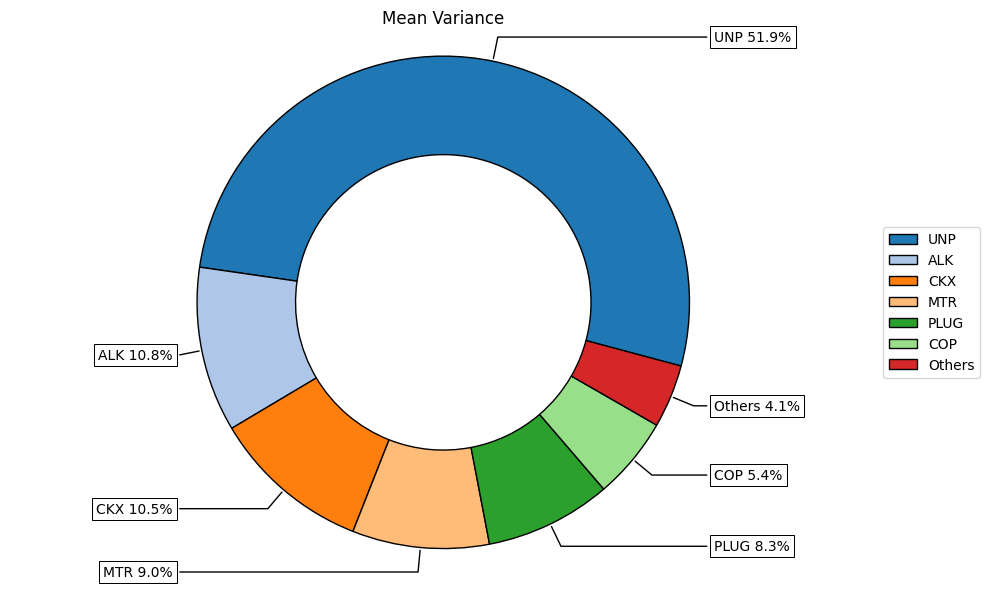

In [141]:
#plot the weights
ax = rp.PlotFunctions.plot_pie(w=w_1, nrow=10, title='Mean Variance', cmap = "tab20", height=6, width=10, ax=None)

In [ ]:
frontier = port1.efficient_frontier(model='Classic', rm='MV', kelly="approx", points=100, rf=0, hist=True)
display(frontier.T.head())

,AAL,ALK,BP,CHRW,CKX,COP,CVX,FDX,MTR,PLUG,SHEL,TTE,UNP,XOM
0,1.903949e-09,0.009082,1.201582e-07,0.314313,0.190971,8.449803e-10,5.876115e-09,3.399420e-02,0.040843,1.964957e-09,8.886163e-03,2.242510e-02,0.163422,0.216065
1,7.909398e-11,0.032996,7.955512e-11,0.273218,0.177117,4.412181e-11,3.388348e-10,3.148651e-03,0.050697,1.391027e-02,1.889402e-10,3.055912e-10,0.255740,0.193173
2,2.601916e-10,0.041058,1.807798e-10,0.250766,0.170445,1.947216e-10,6.080478e-03,6.568307e-10,0.054957,2.086018e-02,3.792979e-10,5.297442e-10,0.289362,0.166470
3,4.006552e-10,0.046844,2.197346e-10,0.232755,0.165307,3.788437e-10,1.420876e-02,7.448405e-10,0.058205,2.612915e-02,4.317009e-10,5.692619e-10,0.313661,0.142890
4,5.564767e-10,0.051727,2.565574e-10,0.217552,0.160970,6.377157e-10,2.108803e-02,7.724079e-10,0.060947,3.057700e-02,4.871092e-10,6.223117e-10,0.334170,0.122969


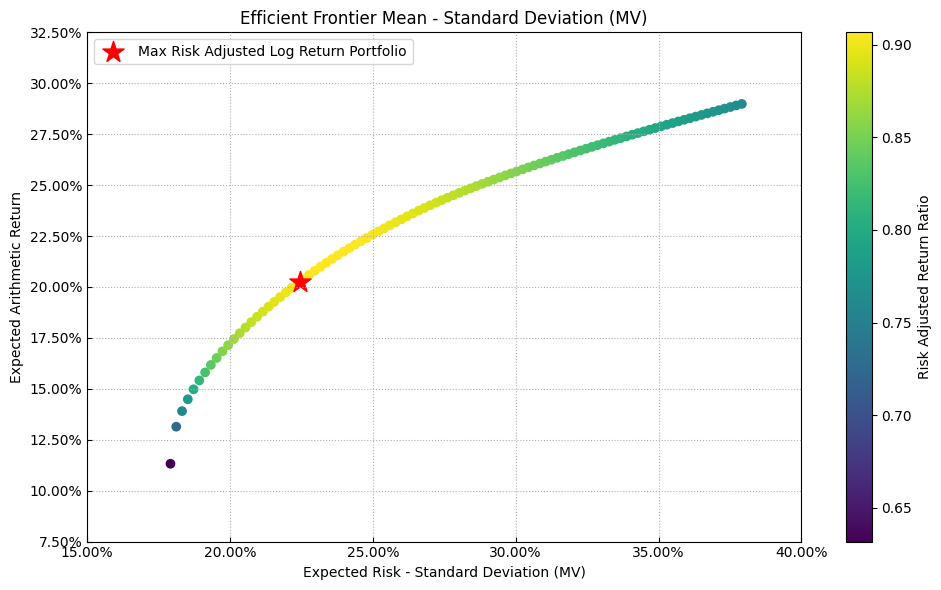

In [135]:
label = 'Max Risk Adjusted Log Return Portfolio' 
mu = port1.mu
cov = port1.cov 
returns = port1.returns 
ax = rp.plot_frontier(w_frontier=frontier, 
                      mu=mu, 
                      cov=cov, 
                      returns=returns, 
                      rm='MV',
                      rf=0, 
                      alpha=0.05, 
                      cmap='viridis', 
                      w=w_1, 
                      label=label,
                      marker='*', 
                      s=16, 
                      c='r', 
                      height=6, 
                      width=10, 
                      ax=None)

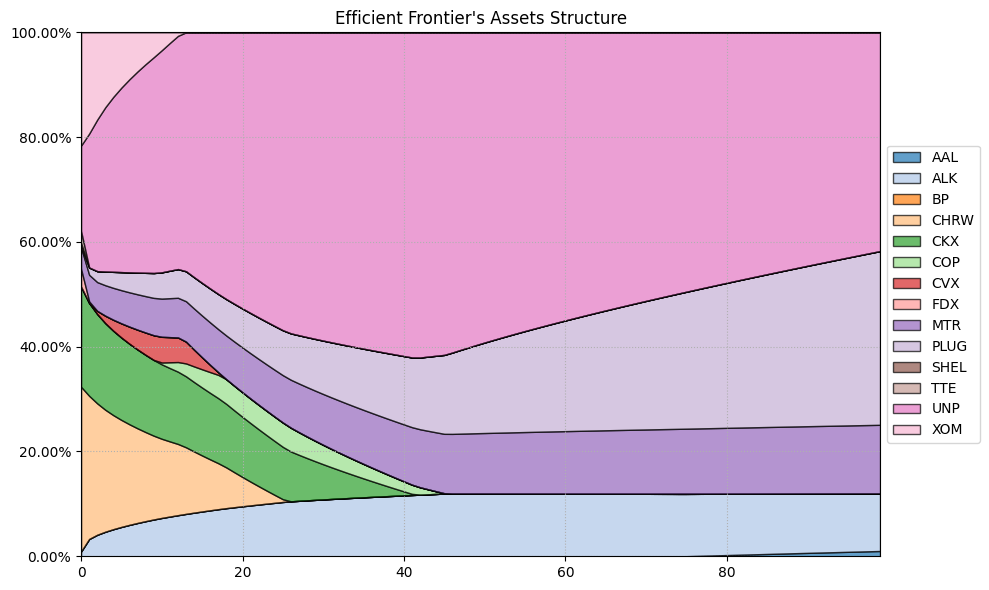

In [129]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)